### Análise de sentimentos com dados do Twitter
[Base de dados do Kaggle](https://www.kaggle.com/datasets/leandrodoze/tweets-from-mgbr)  


Curso da Udemy:  
https://www.udemy.com/course/analise-e-mineracao-de-texto-classificacao-de-emocao-nlp/learn/lecture/34105460#overview

### 1 - Bibliotecas

In [ ]:
# Modelagem de dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Tirar avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Configurações matplot
plt.rcParams['figure.figsize'] = ( 12, 6 )
plt.style.use('seaborn-darkgrid')


# REGEX
import re 
# NLP
import nltk 

### 2 - Importando a Base de Dados

In [2]:
base_dados = pd.read_csv('data\Tweets_Mg.csv')

In [3]:
### Ver dimensão
base_dados.shape

(8199, 26)

In [4]:
base_dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3 - Modelagem & EDA (Exploração dos dados)

In [6]:
# Avaliar campos nulos
base_dados.isnull().sum()

Unnamed: 0                      0
Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Observação                   8198
Unnamed: 10                  8199
Unnamed: 11                  8199
Unnamed: 12                  8199
Unnamed: 13                  8199
Unnamed: 14                  8199
Unnamed: 15                  8199
Unnamed: 16                  8199
Unnamed: 17                  8199
Unnamed: 18                  8199
Unnamed: 19                  8199
Unnamed: 20                  8199
Unnamed: 21                  8199
Unnamed: 22                  8199
Unnamed: 23                  8199
Unnamed: 24                  8199
dtype: int64

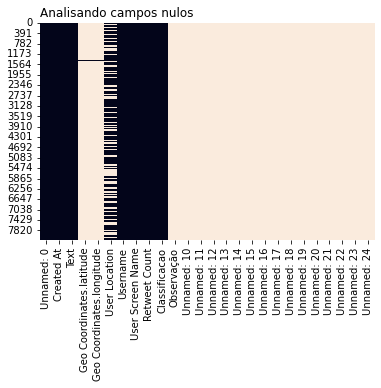

In [10]:
### Dados nulos de forma visual
nulos = base_dados.isnull()

plt.title('Analisando campos nulos', loc='left')
sns.heatmap( nulos, cbar=False );

# Interpretação
# Onde está sem cor são campos NULOS